<a href="https://colab.research.google.com/github/trista-paul/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/TristaWeek5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [58]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)
^C


In [0]:
import seaborn as sns

In [4]:
#title of film
title = pd.read_table("https://datasets.imdbws.com/title.akas.tsv.gz")
title.dtypes

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


titleId            object
ordering            int64
title              object
region             object
language           object
types              object
attributes         object
isOriginalTitle    object
dtype: object

In [5]:
title.head()
#redundant values, high quantities of NaNs

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
1,tt0000001,2,Καρμενσίτα,GR,\N,\N,\N,0
2,tt0000001,3,Карменсита,RU,\N,\N,\N,0
3,tt0000001,4,Carmencita,US,\N,\N,\N,0
4,tt0000001,5,Carmencita,\N,\N,original,\N,1


In [6]:
title.isnull().sum() #...though they aren't encoded properly

titleId             0
ordering            0
title               0
region             55
language            0
types               0
attributes          0
isOriginalTitle     0
dtype: int64

In [7]:
#Cleaning - drop emptiest cols and cols that aren't useful to main df, then filter by original title
#Then rename and reorganize the title id to be compatible with further dfs
title = title.drop(columns= ['types', 'attributes', 'language', 'region', 'ordering'])
title = title[title['isOriginalTitle'] == 1]
title = title.rename(columns = {'titleId':'tconst'})
title = title.reset_index(drop=True)
title.head()

,tconst,title,isOriginalTitle
0,tt0000001,Carmencita,1
1,tt0000002,Le clown et ses chiens,1
2,tt0000003,Pauvre Pierrot,1
3,tt0000004,Un bon bock,1
4,tt0000005,Blacksmith Scene,1


In [8]:
title.shape

(50718, 3)

In [9]:
title = title.replace({r'\N': np.nan}) #oh my god
#titles with missing values are probably too obscure to matter, so I'll drop nan rows
title = title.dropna()
title.shape

(50718, 3)

In [10]:
#Attributes of film
basics = pd.read_table("https://datasets.imdbws.com/title.basics.tsv.gz")
basics.dtypes

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult            int64
startYear         object
endYear           object
runtimeMinutes    object
genres            object
dtype: object

In [11]:
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [12]:
basics = basics.replace({r'\N': np.nan})
basics.isnull().sum() #primary and original title aren't needed anyway #I think it's valuable to keep genre

tconst                  0
titleType               0
primaryTitle            6
originalTitle         181
isAdult                 0
startYear          310771
endYear           5568278
runtimeMinutes    3911351
genres             442172
dtype: int64

In [13]:
basics.titleType.value_counts()

tvEpisode       3860112
short            664611
movie            510202
video            221628
tvSeries         159323
tvMovie          126053
tvMiniSeries      24698
videoGame         22882
tvSpecial         15864
tvShort            9028
Name: titleType, dtype: int64

In [14]:
basics = basics.drop(columns=['primaryTitle', 'originalTitle', 'endYear'])
basics = basics[basics['titleType']=='movie']
basics = basics.dropna()
basics.head()

,tconst,titleType,isAdult,startYear,runtimeMinutes,genres
8,tt0000009,movie,0,1894,45,Romance
145,tt0000147,movie,0,1897,20,"Documentary,News,Sport"
571,tt0000574,movie,0,1906,70,"Biography,Crime,Drama"
673,tt0000679,movie,0,1908,120,"Adventure,Fantasy"
1173,tt0001184,movie,0,1910,58,"Adventure,Drama"


In [15]:
#Directors and staff of film
director = pd.read_table("https://datasets.imdbws.com/name.basics.tsv.gz")
director.dtypes

nconst               object
primaryName          object
birthYear            object
deathYear            object
primaryProfession    object
knownForTitles       object
dtype: object

In [16]:
director.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0050419,tt0053137,tt0043044"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0037382,tt0071877,tt0117057"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,producer","tt0049189,tt0057345,tt0054452,tt0059956"
3,nm0000004,John Belushi,1949,1982,"actor,writer,soundtrack","tt0072562,tt0080455,tt0077975,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0069467,tt0083922,tt0050976"


In [17]:
director.shape

(9119028, 6)

In [18]:
director = director.replace({r'\N': np.nan})
director.isnull().sum()

nconst                     0
primaryName                0
birthYear            8646142
deathYear            8955067
primaryProfession    1633337
knownForTitles       1213087
dtype: int64

In [19]:
director = director.drop(columns=['primaryProfession', 'deathYear',
                                  'knownForTitles', 'birthYear'])
director = director.rename(columns = {'nconst':'directors'})
director.head()

,directors,primaryName
0,nm0000001,Fred Astaire
1,nm0000002,Lauren Bacall
2,nm0000003,Brigitte Bardot
3,nm0000004,John Belushi
4,nm0000005,Ingmar Bergman


In [20]:
#critical rating of film
review = pd.read_table("https://datasets.imdbws.com/title.ratings.tsv.gz")
review.dtypes

tconst            object
averageRating    float64
numVotes           int64
dtype: object

In [21]:
review.head()

,tconst,averageRating,numVotes
0,tt0000001,5.8,1463
1,tt0000002,6.4,176
2,tt0000003,6.6,1079
3,tt0000004,6.5,105
4,tt0000005,6.2,1781


In [22]:
review = review.replace({r'\N': np.nan})
review.isnull().sum()

tconst           0
averageRating    0
numVotes         0
dtype: int64

In [23]:
#cleaning - drop rows with 1000 or less votes
review = review[review['numVotes']>= 1000]
review = review.reset_index(drop=True)
review.head()

,tconst,averageRating,numVotes
0,tt0000001,5.8,1463
1,tt0000003,6.6,1079
2,tt0000005,6.2,1781
3,tt0000008,5.6,1563
4,tt0000010,6.9,5217


In [24]:
#directors and writers of film by internal id
directorid =  pd.read_table("https://datasets.imdbws.com/title.crew.tsv.gz")
directorid.dtypes

tconst       object
directors    object
writers      object
dtype: object

In [25]:
directorid.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [26]:
directorid = directorid.replace({r'\N': np.nan})
directorid.isnull().sum()

tconst             0
directors    2368179
writers      2789425
dtype: int64

In [27]:
#cleaning - drop writers
directorid = directorid.drop(columns='writers').dropna()
directorid.head()

,tconst,directors
0,tt0000001,nm0005690
1,tt0000002,nm0721526
2,tt0000003,nm0721526
3,tt0000004,nm0721526
4,tt0000005,nm0005690


In [28]:
#merging the datasets
tconst = directorid.merge(review, on='tconst', how='inner')
tconst = tconst.merge(title, on='tconst', how='inner')
tconst = tconst.merge(basics, on='tconst', how='inner')
imdb = tconst.merge(director, on='directors', how='inner')
imdb = imdb.drop(columns=['isOriginalTitle','tconst','directors', 'titleType'])
imdb = imdb.rename(columns = {'primaryName':'director'})
imdb = imdb.sort_values('averageRating', ascending=True)
imdb = imdb.drop_duplicates()
imdb.head()

,averageRating,numVotes,title,isAdult,startYear,runtimeMinutes,genres,director
3142,1.3,3211,"Li hai le, wo de guo",0,2018,90,Documentary,Tie Wei
3075,1.5,1868,Namaste England,0,2018,141,"Comedy,Drama,Romance",Vipul Amrutlal Shah
996,1.7,1046,Ring of Terror,0,1961,71,"Drama,Horror",Clark L. Paylow
3129,1.8,6811,A Sniper's War,0,2018,83,Documentary,Olya Schechter
2631,1.9,11571,Going Overboard,0,1989,99,Comedy,Valerie Breiman


In [29]:
imdb.shape

(3186, 8)

In [30]:
imdb = imdb.replace({r'\N': np.nan})
imdb.isnull().sum()

averageRating     0
numVotes          0
title             0
isAdult           0
startYear         0
runtimeMinutes    0
genres            0
director          0
dtype: int64

# **What are the highest and lowest rated genres?**

In [31]:
#What are the highest and lowest rated genres?
genre = imdb[['genres', 'averageRating']]
genre.head()

,genres,averageRating
3142,Documentary,1.3
3075,"Comedy,Drama,Romance",1.5
996,"Drama,Horror",1.7
3129,Documentary,1.8
2631,Comedy,1.9


In [32]:
genre.groupby('genres').averageRating.nunique()
#oh no

genres
Action                         7
Action,Adventure               5
Action,Adventure,Animation     4
Action,Adventure,Biography     2
Action,Adventure,Comedy       29
Action,Adventure,Crime         8
Action,Adventure,Drama        21
Action,Adventure,Family        4
Action,Adventure,Fantasy      16
Action,Adventure,Horror        2
Action,Adventure,Mystery       1
Action,Adventure,Romance       2
Action,Adventure,Sci-Fi       15
Action,Adventure,Thriller     13
Action,Adventure,Western       1
Action,Animation,Comedy        3
Action,Animation,Crime         1
Action,Animation,Drama         1
Action,Animation,Fantasy       2
Action,Biography,Crime         1
Action,Biography,Drama         3
Action,Comedy                  9
Action,Comedy,Crime           25
Action,Comedy,Drama           13
Action,Comedy,Family           4
Action,Comedy,Fantasy          5
Action,Comedy,History          1
Action,Comedy,Horror           2
Action,Comedy,Mystery          3
Action,Comedy,Romance          6
   

In [33]:
movielist = []
moviemean = []

for genres in ['Horror', 'Action', 'Romance', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama',
              'Family', 'Fantasy', 'Sci-Fi', 'Mystery', 'Thriller', 'Western']:
  MoviesInGenre = genre[genre['genres'].str.contains(genres)]
  m = MoviesInGenre.averageRating.mean()
  movielist.append(genres)
  moviemean.append(m)
print(movielist)
print(moviemean)
Combined = pd.Series(data=moviemean, index=movielist).sort_values()
Combined

['Horror', 'Action', 'Romance', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Sci-Fi', 'Mystery', 'Thriller', 'Western']
[5.731554524361948, 6.13832684824902, 6.729857819905212, 6.285476190476186, 7.1924528301886825, 7.25441176470588, 6.397233864207871, 6.608943089430895, 6.958941176470582, 6.375144508670518, 6.146551724137929, 5.611627906976747, 6.650253807106594, 6.32102272727272, 6.831884057971015]


Sci-Fi       5.611628
Horror       5.731555
Action       6.138327
Fantasy      6.146552
Adventure    6.285476
Thriller     6.321023
Family       6.375145
Comedy       6.397234
Crime        6.608943
Mystery      6.650254
Romance      6.729858
Western      6.831884
Drama        6.958941
Animation    7.192453
Biography    7.254412
dtype: float64

In [34]:
#The 5 lowest rated genres
Combined.head()

Sci-Fi       5.611628
Horror       5.731555
Action       6.138327
Fantasy      6.146552
Adventure    6.285476
dtype: float64

In [35]:
#The 5 highest rated genres
Combined.tail()

Romance      6.729858
Western      6.831884
Drama        6.958941
Animation    7.192453
Biography    7.254412
dtype: float64

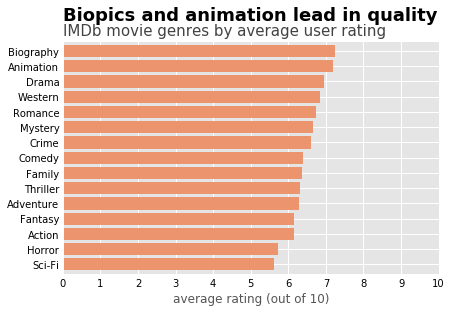

In [216]:
plt.style.use('ggplot')
ax = Combined.plot.barh(color='#EB946D', width=0.8, legend=False);
ax.set(xticks=range(0, 11, 1));
ax.tick_params(axis='both', labelcolor='black')
ax.set_xlabel('average rating (out of 10)')
ax.text(x=0, y=16, s="Biopics and animation lead in quality", fontsize=18, fontweight='bold')
ax.text(x=0, y=15, s='IMDb movie genres by average user rating', fontsize=15, color='#424242');

In [229]:
SciFi = genre[genre['genres'].str.contains('Sci-Fi')]

Count = SciFi.genres.value_counts()
MoreThan5 = Count[Count.values >= 5]
MoreThan5 = MoreThan5.index.tolist()
SciFi = SciFi[SciFi.genres.isin(MoreThan5)]

SciFi = SciFi.groupby('genres').averageRating.mean()
SciFi = SciFi.sort_values(ascending=False)
SciFi

genres
Drama,Sci-Fi                7.460000
Adventure,Comedy,Sci-Fi     6.916667
Drama,Horror,Sci-Fi         6.462500
Comedy,Romance,Sci-Fi       6.175000
Action,Crime,Sci-Fi         5.966667
Adventure,Fantasy,Sci-Fi    5.940000
Horror,Sci-Fi,Thriller      5.800000
Action,Adventure,Sci-Fi     5.711765
Adventure,Sci-Fi            5.657143
Comedy,Horror,Sci-Fi        5.636842
Action,Horror,Sci-Fi        5.557143
Comedy,Sci-Fi               5.316667
Action,Sci-Fi               5.066667
Horror,Sci-Fi               4.876596
Sci-Fi                      3.833333
Name: averageRating, dtype: float64

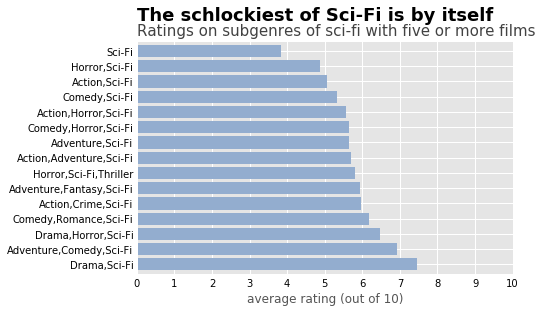

In [234]:
plt.style.use('ggplot')
ax = SciFi.plot.barh(color='#93ADCF', width=0.8, legend=False);
ax.set(xticks=range(0, 11, 1));
ax.tick_params(axis='both', labelcolor='black')
ax.set_xlabel('average rating (out of 10)')
ax.set_ylabel('')
ax.text(x=0, y=16, s="The schlockiest of Sci-Fi is by itself", fontsize=18, fontweight='bold')
ax.text(x=0, y=15, s='Ratings on subgenres of sci-fi with five or more films', fontsize=15, color='#424242');

# **Who are the highest and lowest rated directors?**

In [37]:
#Who are the highest and lowest rated directors?
directors = imdb[['director', 'averageRating']]
directors.head()
directorCount = directors.director.value_counts()
#lots of directors with only 1 film with more than 1000 votes *cries in Errol Morris*
MoreThan5 = directorCount[directorCount.values >= 5]
MoreThan5 = MoreThan5.index.tolist()
#our conditional list - theatre films with more than 1000 votes from directors with 5 or more other movies with 1000 votes
directors = directors[directors.director.isin(MoreThan5)]
directors.head()

,director,averageRating
199,Roger Corman,2.9
200,Roger Corman,3.1
2143,Albert Pyun,3.1
363,Bert I. Gordon,3.4
204,Roger Corman,3.4


In [38]:
DirectorRating = directors.groupby(directors['director']).mean()
type(DirectorRating) #dataframe
DirectorRating.reset_index()
DirectorRating = DirectorRating.sort_values(by = ['averageRating'])
#The Absolute Worst
DirectorRating.head()

,averageRating
director,
Bert I. Gordon,4.140000
Albert Pyun,5.214286
Bob Clark,5.300000
Sam Firstenberg,5.383333
Mark L. Lester,5.633333


In [39]:
#The Best
DirectorRating.tail()

,averageRating
director,
Yasujirô Ozu,8.085714
Akira Kurosawa,8.085714
Stanley Kubrick,8.120000
Satyajit Ray,8.166667
Masaki Kobayashi,8.520000


#**How Does Runtime Effect Rating?**

In [40]:
#graph got 'no numeric types' error so I'm checking the value types
print(type(imdb['runtimeMinutes'][0])) #need to convert to integer
type(imdb['averageRating'][0])

<class 'str'>


numpy.float64

In [0]:
imdb[['runtimeMinutes', 'averageRating']] = imdb[['runtimeMinutes',
                                                  'averageRating']].astype(float)

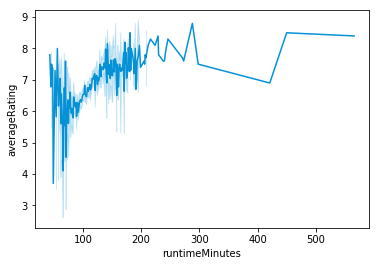

In [42]:
ax = sns.lineplot(data=imdb, x=imdb['runtimeMinutes'], y=imdb['averageRating'],
                  color='#0491D5', dashes=False, legend=False);
#Most of the data is clearly under the 250 minute mark;
#it doesn't look like there's a relationship but slicing out outliers could help

In [158]:
length = imdb[['runtimeMinutes', 'averageRating']]
length = length[length['runtimeMinutes']<=250]

ratingRange = np.linspace(0, 10, 11)
timeRange = [40, 60, 80, 100, 120, 140, 160, 180, 200, 250]
runtimeBin = pd.cut(length['runtimeMinutes'], timeRange, right=False)
ratingBin = pd.cut(length['averageRating'], ratingRange, right=False)
ct = pd.crosstab(runtimeBin, ratingBin, normalize='columns');
ct

averageRating,"[0.0, 1.0)","[1.0, 2.0)","[2.0, 3.0)","[3.0, 4.0)","[4.0, 5.0)","[5.0, 6.0)","[6.0, 7.0)","[7.0, 8.0)","[8.0, 9.0)","[9.0, 10.0)"
runtimeMinutes,,,,,,,,,,
"[40, 60)",0.0,0.0,0.024390,0.027397,0.005348,0.000000,0.004921,0.009166,0.007576,0.00
"[60, 80)",0.0,0.2,0.292683,0.205479,0.074866,0.038229,0.030512,0.054995,0.045455,0.00
"[80, 100)",0.0,0.6,0.585366,0.671233,0.695187,0.575453,0.410433,0.306141,0.250000,0.50
"[100, 120)",0.0,0.0,0.073171,0.082192,0.181818,0.334004,0.419291,0.363886,0.246212,0.00
"[120, 140)",0.0,0.0,0.024390,0.000000,0.016043,0.040241,0.096457,0.155820,0.219697,0.25
"[140, 160)",0.0,0.2,0.000000,0.013699,0.021390,0.008048,0.023622,0.062328,0.121212,0.25
"[160, 180)",0.0,0.0,0.000000,0.000000,0.005348,0.004024,0.009843,0.030247,0.060606,0.00
"[180, 200)",0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.003937,0.010999,0.026515,0.00
"[200, 250)",0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000984,0.006416,0.022727,0.00


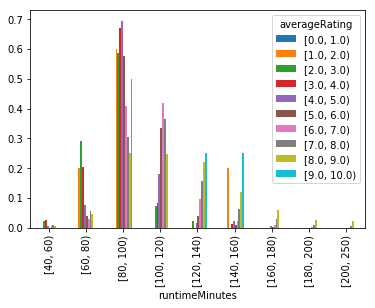

In [159]:
ct.plot(kind='bar');
#it appears that the longer length movies are most likely to have a 8-10 score
#while the scores for 80-100 minute movies are fairly normally distributed
#scores for 40-80 minute movies trend to 1-4 score

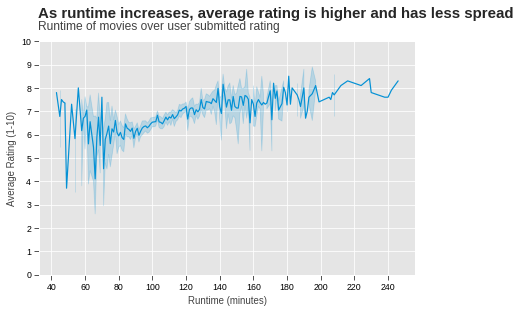

In [252]:
sns.set_context("paper")
ax = sns.lineplot(data=length, x=length['runtimeMinutes'],
                  y=length['averageRating'],
                  color='#0491D5', dashes=False, legend=False);
ax.text(x=32, y=11, s="As runtime increases, average rating is higher and has less spread", fontsize=15, fontweight='bold')
ax.text(x=32, y=10.5, s='Runtime of movies over user submitted rating', fontsize=12, color='#424242');
ax.set(yticks=range(0,11,1));
ax.set(xticks=range(40, 250, 20));
ax.tick_params(axis='both', labelcolor='black')
plt.xlabel('Runtime (minutes)', color='#424242');
plt.ylabel('Average Rating (1-10)', color='#424242');

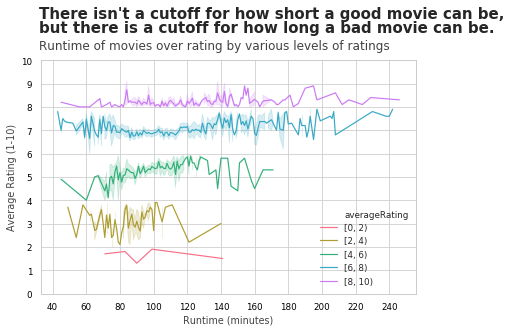

In [256]:
#Line plot comparing 1-4, 5-6, 7-8, 9-10
ratingRange = [0, 2, 4, 6, 8, 10]
ratingBin = pd.cut(length['averageRating'], ratingRange, right=False)

sns.set_context("paper")
ax = sns.lineplot(data=length, x=length['runtimeMinutes'],
                  y=length['averageRating'], hue=ratingBin,
                  dashes=False, legend='brief', palette='husl');
ax.set(yticks=range(0,11,1));
ax.set(xticks=range(40, 250, 20));
ax.tick_params(axis='both', labelcolor='black')
ax.text(x=32, y=11.8, s="There isn't a cutoff for how short a good movie can be,", fontsize=15, fontweight='bold')
ax.text(x=32, y=11.2, s="but there is a cutoff for how long a bad movie can be.", fontsize=15, fontweight='bold')
ax.text(x=32, y=10.5, s='Runtime of movies over rating by various levels of ratings', fontsize=12, color='#424242');
plt.xlabel('Runtime (minutes)', color='#424242');
plt.ylabel('Average Rating (1-10)', color='#424242');

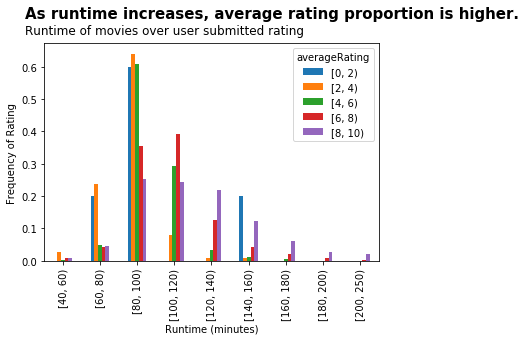

In [162]:
ratingRange = [0, 2, 4, 6, 8, 10]
timeRange = [40, 60, 80, 100, 120, 140, 160, 180, 200, 250]
runtimeBin = pd.cut(length['runtimeMinutes'], timeRange, right=False)
ratingBin = pd.cut(length['averageRating'], ratingRange, right=False)
ct = pd.crosstab(runtimeBin, ratingBin, normalize='columns');
ax = ct.plot(kind='bar');
ax.text(x=-1, y=0.75, s="As runtime increases, average rating proportion is higher.", fontsize=15, fontweight='bold')
ax.text(x=-1, y=0.7, s='Runtime of movies over user submitted rating', fontsize=12);
plt.xlabel('Runtime (minutes)');
plt.ylabel('Frequency of Rating');

#**do adult films have a different rating trend than non-adult films?**

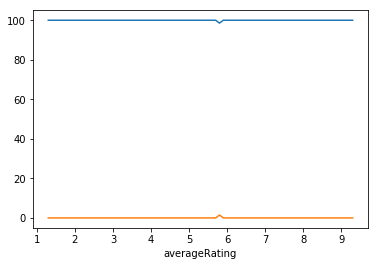

In [48]:
#do adult films have a different rating trend than non-adult films?
x = pd.crosstab(imdb['averageRating'], imdb['isAdult'], normalize='index')*100
ax = sns.lineplot(data=x, color=['#0491D5', '#FF2801'], hue='isAdult', dashes=False, legend=False);
#well darn
#for nearly all ratings 100% of examples are non-adult films

In [49]:
imdb['isAdult'].value_counts() #lol
#question cancelled

0    3185
1       1
Name: isAdult, dtype: int64

#**What were the best and worst decades for film? **

In [0]:
imdb['startYear'] = imdb['startYear'].astype(int)

In [167]:
timeline = imdb[['startYear', 'averageRating']]
timeline = timeline[timeline['startYear']>=1920]

decades = [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
decadeBin = pd.cut(timeline['startYear'], decades, right=False)
DecadeRating = timeline.groupby(decadeBin).count()
DecadeRating[['yearMean', 'ratingMean']] = timeline.groupby(decadeBin).mean()
DecadeRating
#many categories have under 10 entries
#the first category to have more than 10 has more than 100
#so our cutoff will be >= 100

,startYear,averageRating,yearMean,ratingMean
startYear,,,,
"[1920, 1930)",127,127,1925.566929,7.480315
"[1930, 1940)",7,7,1930.714286,7.314286
"[1940, 1950)",0,0,NaN,NaN
"[1950, 1960)",268,268,1958.201493,6.778731
"[1960, 1970)",569,569,1962.156415,6.944112
"[1970, 1980)",3,3,1972.000000,5.966667
"[1980, 1990)",1357,1357,1985.886514,6.359912
"[1990, 2000)",673,673,1993.995542,6.339079
"[2000, 2010)",19,19,2000.368421,6.573684


In [168]:
DecadeRating = DecadeRating[DecadeRating.averageRating >= 100]
DecadeRating = DecadeRating.drop(columns=['yearMean', 'startYear'])
DecadeRating = DecadeRating.rename(columns = {'averageRating':'Number_of_films'})
DecadeRating
DecadeRating.sort_values(by='ratingMean')
#there is no particular trend here

,Number_of_films,ratingMean
startYear,,
"[1990, 2000)",673,6.339079
"[1980, 1990)",1357,6.359912
"[2010, 2020)",137,6.751825
"[1950, 1960)",268,6.778731
"[1960, 1970)",569,6.944112
"[1920, 1930)",127,7.480315


In [0]:
DecadeRating = DecadeRating.drop(columns=['Number_of_films'])

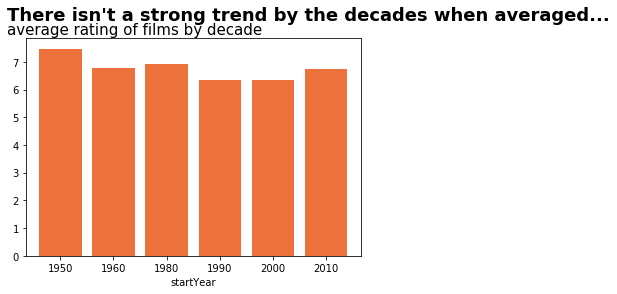

In [185]:
ax = DecadeRating.plot.bar(color='#ED713A', width=0.8, legend=False);
ax.text(x=-1, y=8.5, s="There isn't a strong trend by the decades when averaged...", fontsize=18, fontweight='bold')
ax.text(x=-1, y=8, s='average rating of films by decade', fontsize=15);
ax.set_xticklabels([1950, 1960, 1980, 1990, 2000, 2010]);
ax.tick_params(axis='x', labelrotation=0)


In [0]:
timeline = imdb[['startYear', 'averageRating']]
timeline = timeline[timeline['startYear']>=1950]

decades = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
decadeBin = pd.cut(timeline['startYear'], decades, right=False)
ratingRange = [0, 2, 4, 6, 8, 10]
ratingBin = pd.cut(timeline['averageRating'], ratingRange, right=False)
ct = pd.crosstab(decadeBin, ratingBin, normalize='columns');

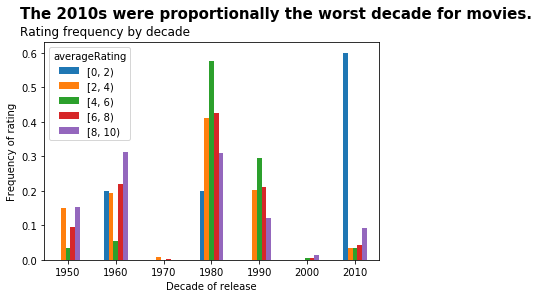

In [173]:
ax = ct.plot(kind='bar');
ax.set_xticklabels([1950, 1960, 1970, 1980, 1990, 2000, 2010]);
ax.tick_params(axis='x', labelrotation=0)
plt.xlabel('Decade of release');
plt.ylabel('Frequency of rating');
ax.text(x=-1, y=0.7, s="The 2010s were proportionally the worst decade for movies.", fontsize=15, fontweight='bold')
ax.text(x=-1, y=0.65, s='Rating frequency by decade', fontsize=12);